In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Movie ratings matrix
ratings = np.array([
    [5, 3, 4, 4, 2, 1],
    [4, 3, 4, 3, 3, 2],
    [3, 4, 3, 5, 3, 4],
    [4, 5, 5, 4, 3, 3],
    [5, 4, 4, 4, 4, 4]
])

# Performing SVD
U, Sigma, VT = np.linalg.svd(ratings)

# Full decomposition results
print("Left Singular Vectors (U):\n", U)
print("\nSingular Values (Sigma):\n", Sigma)
print("\nRight Singular Vectors (V^T):\n", VT)

Left Singular Vectors (U):
 [[ 0.40150925  0.68444144 -0.41822517 -0.40358955 -0.18037023]
 [ 0.38900718  0.2660399   0.36129407  0.10741534  0.79738618]
 [ 0.44045627 -0.65448075 -0.47196435 -0.29770946  0.25743339]
 [ 0.49054933  0.00101746 -0.19539358  0.80843538 -0.26002672]
 [ 0.50281544 -0.18004611  0.65850232 -0.28875374 -0.44469766]]

Singular Values (Sigma):
 [20.21998084  3.01613829  1.59817204  1.51721228  0.4463156 ]

Right Singular Vectors (V^T):
 [[ 4.62968702e-01  4.25192429e-01  4.42505016e-01  4.42572079e-01
   3.35030911e-01  3.17718324e-01]
 [ 5.39353194e-01 -1.59666467e-01  3.72458368e-01 -1.50070347e-01
  -1.70274600e-01 -7.02399435e-01]
 [ 2.81005190e-01 -2.51292929e-01  8.39954085e-03 -6.86037075e-01
   5.50233222e-01  2.90540752e-01]
 [-4.55731843e-01  5.32424823e-01  5.33436712e-01 -4.62646483e-01
  -7.10317690e-02 -7.20436573e-02]
 [-4.56182730e-01 -4.43952350e-01  3.61716460e-01  3.11320107e-01
   5.48597064e-01 -2.57071745e-01]
 [ 7.73945894e-17 -5.00000000e

In [ ]:
# Keeping only the top k=2 singular values for dimensionality reduction
k = 2
Sigma_k = np.zeros((ratings.shape[0], ratings.shape[1]))  # Create a zero matrix
np.fill_diagonal(Sigma_k, Sigma[:k])

# Reconstruct using reduced directions
ratings_reduced = U @ Sigma_k @ VT
print("Reduced Ratings Matrix (Approximation):\n", ratings_reduced)

Reduced Ratings Matrix (Approximation):
 [[ 4.71420874  6.21839774  2.32178955  8.51246182 -4.19892133 -0.30231314]
 [-1.37553368 -5.6048681   9.84567199  3.21854902 15.34037009 -0.11017   ]
 [-1.58849231  3.71108338  4.52941676 12.82066093  0.98837079  0.17003741]
 [ 4.77083692  8.84219576  3.75601731  4.3348653  -1.90885518  3.17732327]
 [12.65443025  4.59188242  0.69143475 -6.94982162  5.95400118  9.85444886]]


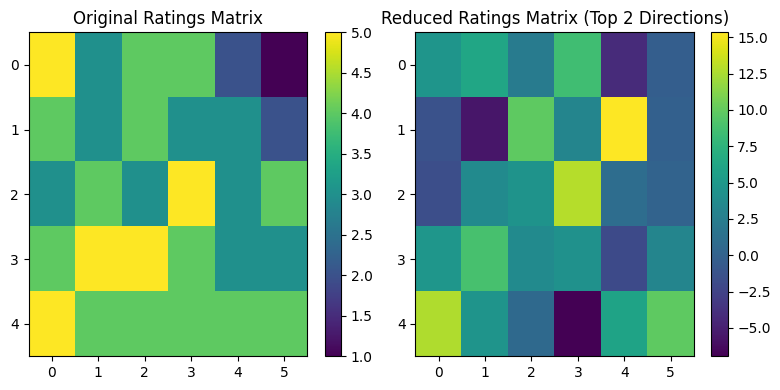

In [ ]:
# Original and reduced matrices for comparison
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.title("Original Ratings Matrix")
plt.imshow(ratings, cmap='viridis', aspect='auto')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.title("Reduced Ratings Matrix (Top 2 Directions)")
plt.imshow(ratings_reduced, cmap='viridis', aspect='auto')
plt.colorbar()

plt.tight_layout()
plt.show()

In [ ]:
import numpy as np

# Updated adjacency matrix for a larger graph (6 pages)
# A → B, A → C
# B → C, B → D
# C → D, C → E
# D → E, D → F
# E → F
# F → A
adj_matrix = np.array([
    [0, 1, 1, 0, 0, 0],  # A links to B, C
    [0, 0, 1, 1, 0, 0],  # B links to C, D
    [0, 0, 0, 1, 1, 0],  # C links to D, E
    [0, 0, 0, 0, 1, 1],  # D links to E, F
    [0, 0, 0, 0, 0, 1],  # E links to F
    [1, 0, 0, 0, 0, 0],  # F links to A
])

# Number of pages
N = adj_matrix.shape[0]

# Normalize the adjacency matrix (transition matrix)
row_sums = adj_matrix.sum(axis=1)
# To avoid division by zero for dangling nodes (rows with sum 0), we replace 0 with 1.
row_sums[row_sums == 0] = 1
transition_matrix = adj_matrix / row_sums[:, None]  # Normalize each row

# PageRank parameters
alpha = 0.85  # Damping factor
tol = 1e-6    # Convergence tolerance
max_iter = 100  # Maximum iterations

# Add teleportation (random jump to any page)
teleport = np.ones((N, N)) / N
M = alpha * transition_matrix + (1 - alpha) * teleport

# Initialize the PageRank vector (uniform distribution)
ranks = np.ones(N) / N

# Power iteration for PageRank computation
for _ in range(max_iter):
    new_ranks = M @ ranks
    # Check for convergence (change in PageRank vector is small)
    if np.linalg.norm(new_ranks - ranks, 1) < tol:
        break
    ranks = new_ranks

# Output the final PageRank
print("Efficient PageRank:", ranks)


Efficient PageRank: [0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667]


In [ ]:
import numpy as np

# Updated adjacency matrix for a larger graph (6 pages)
# A → B, A → C
# B → C, B → D
# C → D, C → E
# D → E, D → F
# E → F
# F → A
adj_matrix = np.array([
    [0, 1, 1, 0, 0, 0],  # A links to B, C
    [0, 0, 1, 1, 0, 0],  # B links to C, D
    [0, 0, 0, 1, 1, 0],  # C links to D, E
    [0, 0, 0, 0, 1, 1],  # D links to E, F
    [0, 0, 0, 0, 0, 1],  # E links to F
    [1, 0, 0, 0, 0, 0],  # F links to A
])

# Number of pages
N = adj_matrix.shape[0]

# Normalize the adjacency matrix (transition matrix)
row_sums = adj_matrix.sum(axis=1)
# To avoid division by zero for dangling nodes (rows with sum 0), we replace 0 with 1.
row_sums[row_sums == 0] = 1
transition_matrix = adj_matrix / row_sums[:, None]  # Normalize each row

# PageRank parameters
alpha = 0.85  # Damping factor
tol = 1e-6    # Convergence tolerance
max_iter = 100  # Maximum iterations

# Add teleportation (random jump to any page)
teleport = np.ones((N, N)) / N
M = alpha * transition_matrix + (1 - alpha) * teleport

# Debug print: Transition matrix with teleportation
print("Transition Matrix M (with teleportation):")
print(M)

# Initialize the PageRank vector (uniform distribution)
ranks = np.ones(N) / N

# Power iteration for PageRank computation
for i in range(max_iter):
    new_ranks = M @ ranks
    # Check for convergence (change in PageRank vector is small)
    if np.linalg.norm(new_ranks - ranks, 1) < tol:
        print(f"Converged after {i + 1} iterations.")
        break
    ranks = new_ranks

# Output the final PageRank
print("Efficient PageRank:", ranks)


Transition Matrix M (with teleportation):
[[0.025 0.45  0.45  0.025 0.025 0.025]
 [0.025 0.025 0.45  0.45  0.025 0.025]
 [0.025 0.025 0.025 0.45  0.45  0.025]
 [0.025 0.025 0.025 0.025 0.45  0.45 ]
 [0.025 0.025 0.025 0.025 0.025 0.875]
 [0.875 0.025 0.025 0.025 0.025 0.025]]
Converged after 1 iterations.
Efficient PageRank: [0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667]


In [ ]:
import numpy as np

# Number of pages
n = 4

# Adjacency matrix representing the graph structure
# A -> B, C
# B -> C
# C -> B, D
# D -> (dangling node)
adj_matrix = np.array([
    [0, 1, 1, 0],  # A -> B, C
    [0, 0, 1, 0],  # B -> C
    [0, 1, 0, 1],  # C -> B, D
    [0, 0, 0, 0]   # D -> dangling node
])

# Normalize the adjacency matrix to create the transition matrix
row_sums = adj_matrix.sum(axis=1)
row_sums[row_sums == 0] = 1  # Handle dangling nodes
transition_matrix = adj_matrix / row_sums[:, None]

# Damping factor and teleportation matrix (uniform random jump)
alpha = 0.85
teleport_matrix = np.ones((n, n)) / n
M = alpha * transition_matrix + (1 - alpha) * teleport_matrix

# Initialize the PageRank vector
ranks = np.ones(n) / n  # Equal probability at the start

# Set maximum iterations and tolerance for convergence
max_iter = 100
tol = 1e-6

# Power iteration to compute PageRank
for i in range(max_iter):
    new_ranks = M @ ranks
    # Check for convergence (change in PageRank vector is small)
    if np.linalg.norm(new_ranks - ranks, 1) < tol:
        print(f"Converged after {i + 1} iterations.")
        break
    ranks = new_ranks

# Output the final PageRank
print("Efficient PageRank:", ranks)


Converged after 50 iterations.
Efficient PageRank: [1.49819757e-06 1.33488456e-06 1.03719731e-06 1.96874025e-07]


In [ ]:
from pyspark.sql import SparkSession
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Step 1: Initialize Spark Session
spark = SparkSession.builder \
    .appName("LargeScaleMachineLearning") \
    .config("spark.executor.memory", "2g") \
    .getOrCreate()

# Step 2: Load a Large Dataset
# Replace "path_to_large_dataset.csv" with the path to your dataset
data = spark.read.csv("path_to_large_dataset.csv", header=True, inferSchema=True)

# Step 3: Data Preparation
# Selecting features and label columns
assembler = VectorAssembler(
    inputCols=["feature1", "feature2", "feature3"],  # Replace with actual feature columns
    outputCol="features"
)
data = assembler.transform(data)

# Step 4: Split Data into Training and Testing Sets
train, test = data.randomSplit([0.8, 0.2], seed=42)

# Step 5: Train Logistic Regression Model
lr = LogisticRegression(featuresCol="features", labelCol="label")  # Replace 'label' with your target column
model = lr.fit(train)

# Step 6: Evaluate the Model
predictions = model.transform(test)
evaluator = MulticlassClassificationEvaluator(
    labelCol="label",
    predictionCol="prediction",
    metricName="accuracy"
)
accuracy = evaluator.evaluate(predictions)
print(f"Test Accuracy: {accuracy:.2f}")

# Step 7: Stop the Spark Session
spark.stop()

AnalysisException: [PATH_NOT_FOUND] Path does not exist: file:/content/path_to_large_dataset.csv.

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Create a Synthetic Dataset
data = {
    "study_hours": [1, 5, 3, 10, 7, 2, 4, 8, 6, 9],
    "class_attendance": [50, 85, 70, 95, 90, 60, 75, 92, 88, 93],
    "pass_fail": [0, 1, 0, 1, 1, 0, 0, 1, 1, 1],  # 0 = Fail, 1 = Pass
}

df = pd.DataFrame(data)

# Split Data into Features (X) and Target (y)
X = df[["study_hours", "class_attendance"]]
y = df["pass_fail"]

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Decision Tree Classifier
clf = DecisionTreeClassifier(criterion="gini", max_depth=3, random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [ ]:
# Make Predictions
y_pred = clf.predict(X_test)

# Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Visualize Decision Rules
rules = export_text(clf, feature_names=["study_hours", "class_attendance"])
print("\nDecision Tree Rules:\n")
print(rules)

# Predict for a New Student
new_student = [[6, 85]]  # 6 hours of study, 85% attendance
prediction = clf.predict(new_student)
print(f"\nPrediction for new student: {'Pass' if prediction[0] == 1 else 'Fail'}")

Accuracy: 0.67

Decision Tree Rules:

|--- study_hours <= 5.50
|   |--- class: 0
|--- study_hours >  5.50
|   |--- class: 1


Prediction for new student: Pass


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Accuracy: 100.00%


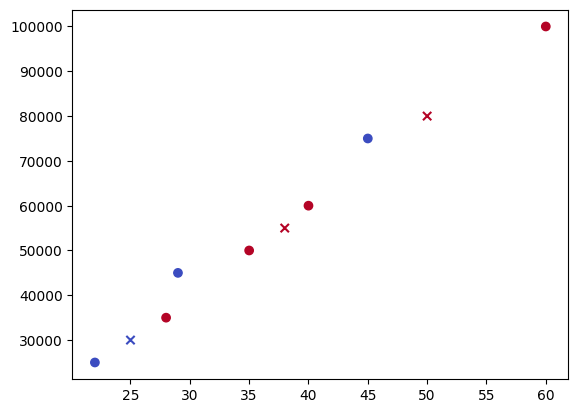

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Modified dataset with some random noise
data = {
    'age': [22, 25, 28, 35, 40, 50, 60, 29, 38, 45],
    'income': [25000, 30000, 35000, 50000, 60000, 80000, 100000, 45000, 55000, 75000],
    'buy': [0, 0, 1, 1, 1, 1, 1, 0, 1, 0]  # Adding some noise to the target variable
}

# Convert the dictionary to a pandas DataFrame
df = pd.DataFrame(data)

# Features (age, income) and target variable (buy/don't buy)
X = df[['age', 'income']]
y = df['buy']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the SVM classifier
clf = svm.SVC(kernel='linear')  # Using a linear kernel for simplicity
clf.fit(X_train, y_train)

# Predicting on the test set
y_pred = clf.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Visualizing the decision boundary
plt.scatter(X_train['age'], X_train['income'], c=y_train, cmap='coolwarm', label='Training data')
plt.scatter(X_test['age'], X_test['income'], c=y_test, cmap='coolwarm', marker='x', label='Test data')

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


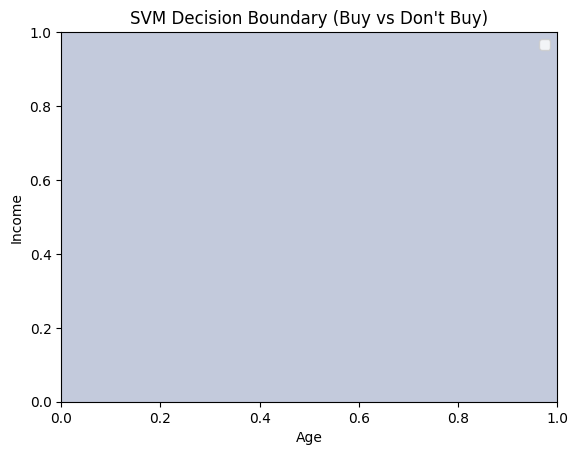

In [ ]:
# Plot decision boundary
ax = plt.gca()
x_min, x_max = ax.get_xlim()
y_min, y_max = ax.get_ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3)

# Adding labels and title
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('SVM Decision Boundary (Buy vs Don\'t Buy)')
plt.legend()
plt.show()

In [ ]:
import numpy as np
import pandas as pd
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Generate a dataset with realistic random values
np.random.seed(42)
n_samples = 100
age = np.random.randint(18, 65, n_samples)  # Random ages between 18 and 65
income = np.random.randint(20000, 120000, n_samples)  # Random income between 20k and 120k
buy = np.random.choice([0, 1], size=n_samples)  # Random buy (0) or don't buy (1)

# Create a DataFrame with these values
df = pd.DataFrame({
    'age': age,
    'income': income,
    'buy': buy
})

# Features (age, income) and target variable (buy/don't buy)
X = df[['age', 'income']]
y = df['buy']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the SVM classifier
clf = svm.SVC(kernel='linear')  # Using a linear kernel for simplicity
clf.fit(X_train, y_train)

# Predicting on the test set
y_pred = clf.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 40.00%


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


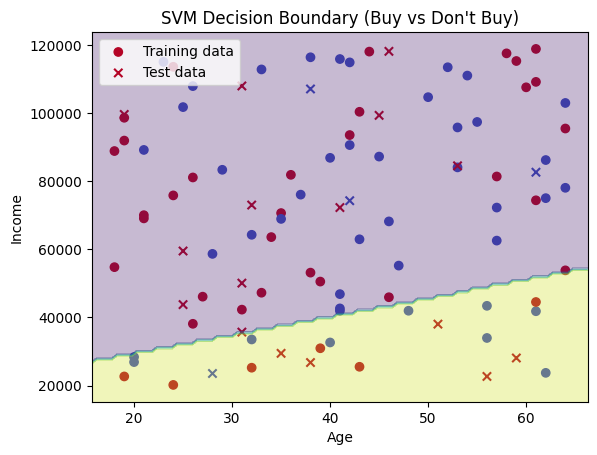

In [ ]:
# Visualizing the decision boundary
plt.scatter(X_train['age'], X_train['income'], c=y_train, cmap='coolwarm', label='Training data')
plt.scatter(X_test['age'], X_test['income'], c=y_test, cmap='coolwarm', marker='x', label='Test data')

# Plot decision boundary
ax = plt.gca()
x_min, x_max = ax.get_xlim()
y_min, y_max = ax.get_ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3)

# Adding labels and title
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('SVM Decision Boundary (Buy vs Don\'t Buy)')
plt.legend()
plt.show()

In [ ]:
from pyspark.sql import SparkSession
from pyspark.ml.regression import LinearRegression
from pyspark.ml.feature import VectorAssembler
from pyspark.sql.functions import col

# Initialize Spark session
spark = SparkSession.builder.master("local").appName("Large Scale ML").getOrCreate()

# Generate a large-scale synthetic dataset
num_samples = 1000000  # 1 million samples
data = spark.range(num_samples).select((col('id') * 2).alias('feature1'),
                                       (col('id') * 3).alias('feature2'),
                                       (col('id') * 5 + 10).alias('target'))

# Prepare the data (feature engineering)
assembler = VectorAssembler(inputCols=['feature1', 'feature2'], outputCol='features')
data = assembler.transform(data)

# Split data into training and test sets
train_data, test_data = data.randomSplit([0.8, 0.2], seed=1234)

# Create a Linear Regression model
lr = LinearRegression(featuresCol='features', labelCol='target')

# Train the model
lr_model = lr.fit(train_data)

# Make predictions on the test data
predictions = lr_model.transform(test_data)

# Show a few predictions
predictions.select('feature1', 'feature2', 'target', 'prediction').show(5)

# Evaluate the model
training_summary = lr_model.summary
print("Root Mean Squared Error (RMSE):", training_summary.rootMeanSquaredError)
print("R2:", training_summary.r2)

# Stop Spark session
spark.stop()


+--------+--------+------+------------------+
|feature1|feature2|target|        prediction|
+--------+--------+------+------------------+
|       2|       3|    15|14.999966388788227|
|       8|      12|    30| 29.99996638898994|
|      42|      63|   115|  114.999966390133|
|      48|      72|   130|129.99996639033466|
|      50|      75|   135|134.99996639040194|
+--------+--------+------+------------------+
only showing top 5 rows

Root Mean Squared Error (RMSE): 1.9409726448032852e-05
R2: 1.0


In [ ]:
import numpy as np
from scipy.sparse import csr_matrix

# Updated graph adjacency matrix (asymmetrical structure)
adj_matrix = np.array([
    [0, 1, 1, 0, 0],  # P1 links to P2, P3
    [0, 0, 1, 0, 0],  # P2 links to P3
    [0, 0, 0, 1, 0],  # P3 links to P4
    [1, 0, 0, 0, 0],  # P4 links to P1
    [0, 0, 0, 1, 0]   # P5 links to P4
])

# Number of pages
n = adj_matrix.shape[0]

# Handle dangling nodes
row_sums = adj_matrix.sum(axis=1)
dangling_nodes = (row_sums == 0)
row_sums[dangling_nodes] = 1
transition_matrix = adj_matrix / row_sums[:, None]

# Convert to sparse matrix
M_sparse = csr_matrix(transition_matrix)

# PageRank parameters
alpha = 0.85
tol = 1e-6
max_iter = 100

# Initialize a non-uniform PageRank vector
ranks = np.array([0.4, 0.3, 0.2, 0.05, 0.05])
teleport_vector = np.ones(n) / n

# Power iteration
for i in range(max_iter):
    new_ranks = alpha * (M_sparse @ ranks) + (1 - alpha) * teleport_vector
    if np.linalg.norm(new_ranks - ranks, 1) < tol:
        print(f"Converged after {i + 1} iterations.")
        break
    ranks = new_ranks

# Output the results
print("Efficient PageRank:", ranks)


Converged after 63 iterations.
Efficient PageRank: [0.2000012 0.2000012 0.2000012 0.2000012 0.2000012]


In [ ]:
import numpy as np
from scipy.sparse import csr_matrix

# Adjusted graph adjacency matrix
adj_matrix = np.array([
    [0, 1, 1, 0, 0],
    [1, 0, 1, 1, 0],
    [0, 0, 0, 1, 1],
    [0, 1, 0, 0, 1],
    [1, 0, 0, 0, 0]
])

# Number of pages
n = adj_matrix.shape[0]

# Handle dangling nodes
row_sums = adj_matrix.sum(axis=1)
dangling_nodes = (row_sums == 0)
row_sums[dangling_nodes] = 1
transition_matrix = adj_matrix / row_sums[:, None]

# Convert to sparse matrix
M_sparse = csr_matrix(transition_matrix)

# PageRank parameters
alpha = 0.85
tol = 1e-6
max_iter = 100

# Non-uniform initial ranks
ranks = np.array([0.4, 0.3, 0.2, 0.05, 0.05])
teleport_vector = np.ones(n) / n

# Power iteration
for i in range(max_iter):
    new_ranks = alpha * (M_sparse @ ranks) + (1 - alpha) * teleport_vector
    if np.linalg.norm(new_ranks - ranks, 1) < tol:
        print(f"Converged after {i + 1} iterations.")
        break
    ranks = new_ranks

# Output results
print("Efficient PageRank:", ranks)


Converged after 60 iterations.
Efficient PageRank: [0.20000128 0.20000128 0.20000128 0.20000128 0.20000128]


In [ ]:
import numpy as np
import networkx as nx

# Step 1: Generate a large random directed graph with 1000 nodes
num_nodes = 1000
G = nx.gnp_random_graph(num_nodes, 0.01, directed=True)

# Step 2: Convert the graph to a transition matrix (stochastic matrix)
# Get the adjacency matrix and normalize it to make it stochastic
A = nx.adjacency_matrix(G).todense()
A = np.array(A, dtype=float)

# Handle dangling nodes (nodes with no outgoing links) by adding teleportation
# Transition matrix M (stochastic)
M = A / A.sum(axis=1, keepdims=True)

# Handle dangling nodes by adding teleportation (uniform distribution over all nodes)
dangling_nodes = np.where(np.sum(A, axis=1) == 0)[0]
for i in dangling_nodes:
    M[i, :] = 1.0 / num_nodes  # Assign equal probability for dangling nodes

# Step 3: Set parameters for the power iteration
damping_factor = 0.85  # Teleportation factor
teleportation = (1.0 - damping_factor) / num_nodes * np.ones((num_nodes, 1))

# Initialize PageRank vector to uniform distribution
ranks = np.ones((num_nodes, 1)) / num_nodes

# Step 4: Power iteration to compute PageRank
max_iter = 100
tol = 1e-6
for i in range(max_iter):
    new_ranks = damping_factor * M @ ranks + teleportation
    if np.linalg.norm(new_ranks - ranks, 1) < tol:
        break
    ranks = new_ranks

# Step 5: Output the final PageRank
print("Converged after {} iterations.".format(i+1))
print("Efficient PageRank:", ranks.flatten())

Converged after 1 iterations.
Efficient PageRank: [0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 

In [ ]:
import numpy as np
import networkx as nx

def efficient_pagerank(G, damping_factor=0.85, max_iter=100, tol=1e-6):
    N = len(G)

    # Initialize the PageRank values to 1/N for each node
    pagerank = {node: 1 / N for node in G}

    # Initialize the out-degree for each node
    out_degree = {node: len(list(G.neighbors(node))) for node in G}

    for _ in range(max_iter):
        # Store the new pagerank values
        new_pagerank = {}

        # Apply the PageRank update rule for each node
        for node in G:
            # Calculate the sum of the PageRank values of the neighbors
            rank_sum = 0
            for neighbor in G.predecessors(node):  # Using predecessors for incoming edges
                rank_sum += pagerank[neighbor] / out_degree[neighbor]

            # Update the PageRank value for this node
            new_pagerank[node] = (1 - damping_factor) / N + damping_factor * rank_sum

        # Check for convergence
        diff = sum(abs(new_pagerank[node] - pagerank[node]) for node in G)
        if diff < tol:
            print(f"Converged after {_+1} iterations")
            return new_pagerank

        # Update pagerank for the next iteration
        pagerank = new_pagerank

    print("Reached maximum iterations without full convergence.")
    return pagerank


# Example
if __name__ == "__main__":
    # Simple directed graph
    G = nx.DiGraph()
    G.add_edges_from([(0, 1), (1, 2), (2, 0), (1, 3)])

    # PageRank algorithm
    pagerank_values = efficient_pagerank(G)

    # Results
    for node, rank in pagerank_values.items():
        print(f"Node {node}: {rank:.6f}")


Converged after 32 iterations
Node 0: 0.119667
Node 1: 0.139218
Node 2: 0.096668
Node 3: 0.096668


In [ ]:
import numpy as np

# Transition matrix for the web graph
transition_matrix = np.array([
    [0,   1/3, 1/3, 1/3, 0,   0],   # Page 0 links to Pages 1, 2, and 3
    [0,   0,   1/3, 1/3, 1/3, 0],   # Page 1 links to Pages 2, 3, and 4
    [1/6, 1/6, 1/6, 1/6, 1/6, 1/6], # Page 2 links to all pages equally
    [1/2, 0,   0,   0,   1/2, 0],   # Page 3 links to Pages 0 and 4
    [1/2, 0,   0,   0,   0,   1/2], # Page 4 links to Pages 5 and 0
    [0,   1/2, 0,   1/2, 0,   0],   # Page 5 links to Pages 3 and 1
])

def calculate_pagerank(transition_matrix, damping_factor=0.85, max_iterations=100, tol=1e-6):
    num_pages = transition_matrix.shape[0]
    rank = np.ones(num_pages) / num_pages  # Initialize PageRank equally
    damping_matrix = np.ones((num_pages, num_pages)) / num_pages

    for iteration in range(max_iterations):
        new_rank = (
            damping_factor * transition_matrix.T @ rank +
            (1 - damping_factor) * damping_matrix.sum(axis=1)
        )

        # Check convergence
        if np.linalg.norm(new_rank - rank, ord=1) < tol:
            print(f"Converged after {iteration + 1} iterations")
            break

        rank = new_rank

    return rank

# Calculate PageRank
pagerank = calculate_pagerank(transition_matrix)

# Display the results
print("PageRank Scores:")
for i, score in enumerate(pagerank):
    print(f"Page {i}: {score:.6f}")


Converged after 85 iterations
PageRank Scores:
Page 0: 1.226680
Page 1: 0.929100
Page 2: 0.886374
Page 3: 1.192345
Page 4: 1.045561
Page 5: 0.719933


In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Generate synthetic data
n_samples = 200
n_features = 2  # Two features: Annual Income and Spending Score
n_clusters = 4  # Four clusters for segmentation
random_state = 42

data, labels_true = make_blobs(
    n_samples=n_samples,
    centers=n_clusters,
    cluster_std=1.5,
    random_state=random_state
)

# Convert to a DataFrame for visualization
df = pd.DataFrame(data, columns=["Annual Income", "Spending Score"])

# Apply KMeans Clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=random_state)
df['Cluster'] = kmeans.fit_predict(df)

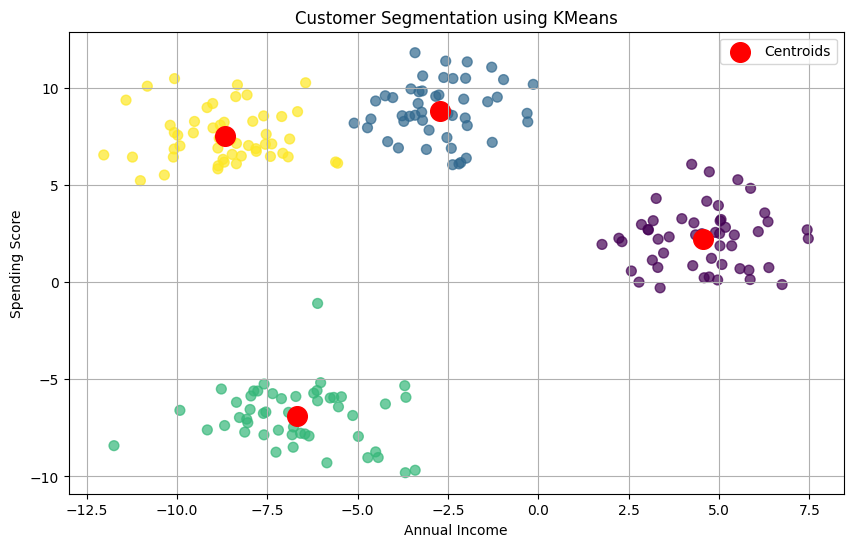

In [ ]:
# Plot the clusters
plt.figure(figsize=(10, 6))
plt.scatter(df['Annual Income'], df['Spending Score'], c=df['Cluster'], cmap='viridis', s=50, alpha=0.7)
plt.scatter(
    kmeans.cluster_centers_[:, 0],
    kmeans.cluster_centers_[:, 1],
    s=200,
    c='red',
    label='Centroids'
)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Customer Segmentation using KMeans')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving customer_data.csv to customer_data.csv


In [ ]:
from pyspark.sql import SparkSession

# Initialize Spark session
spark = SparkSession.builder.appName("CustomerClustering").getOrCreate()

# Load dataset
file_path = "customer_data.csv"
data = spark.read.csv(file_path, header=True, inferSchema=True)

# Display the data schema
data.printSchema()
data.show(5)

root
 |-- CustomerID: integer (nullable = true)
 |-- Age: integer (nullable = true)
 |-- AnnualIncome: integer (nullable = true)
 |-- SpendingScore: integer (nullable = true)

+----------+---+------------+-------------+
|CustomerID|Age|AnnualIncome|SpendingScore|
+----------+---+------------+-------------+
|         1| 56|      118578|           35|
|         2| 69|      137895|           39|
|         3| 46|      129153|           81|
|         4| 32|       86492|          100|
|         5| 60|       21472|           99|
+----------+---+------------+-------------+
only showing top 5 rows



In [ ]:
from pyspark.ml.feature import VectorAssembler

# Select features for clustering
features = ['Age', 'AnnualIncome', 'SpendingScore']
assembler = VectorAssembler(inputCols=features, outputCol="features")

# Prepare the data
final_data = assembler.transform(data).select("features")
final_data.show(5)

+--------------------+
|            features|
+--------------------+
|[56.0,118578.0,35.0]|
|[69.0,137895.0,39.0]|
|[46.0,129153.0,81.0]|
|[32.0,86492.0,100.0]|
| [60.0,21472.0,99.0]|
+--------------------+
only showing top 5 rows



In [ ]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator

# Define KMeans model
kmeans = KMeans(k=5, seed=1, featuresCol="features", predictionCol="prediction")
model = kmeans.fit(final_data)

# Make predictions
predictions = model.transform(final_data)

# Evaluate clustering
evaluator = ClusteringEvaluator()
silhouette_score = evaluator.evaluate(predictions)
print(f"Silhouette Score: {silhouette_score}")

# Display cluster centers
centers = model.clusterCenters()
print("Cluster Centers:")
for i, center in enumerate(centers):
    print(f"Cluster {i}: {center}")

Silhouette Score: 0.7227151900415091
Cluster Centers:
Cluster 0: [   43.50328517 33469.40985213    50.46712657]
Cluster 1: [4.34569285e+01 1.37427536e+05 5.05611720e+01]
Cluster 2: [4.35651866e+01 6.02077811e+04 5.04062775e+01]
Cluster 3: [4.35167709e+01 8.64540881e+04 5.05455390e+01]
Cluster 4: [4.34712861e+01 1.12155246e+05 5.05284384e+01]


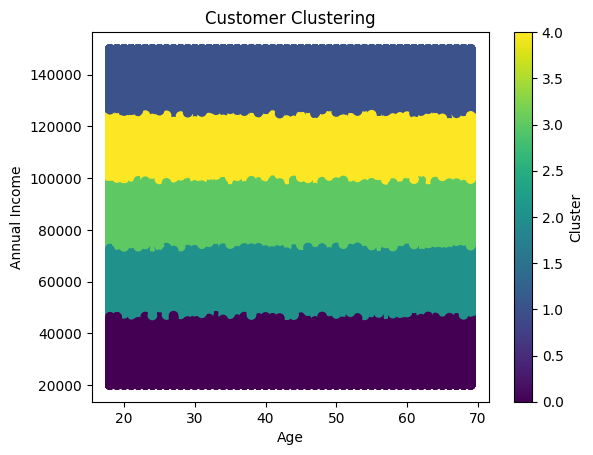

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
predictions_pd = predictions.toPandas()
plt.scatter(predictions_pd["features"].apply(lambda x: x[0]),  # Age
            predictions_pd["features"].apply(lambda x: x[1]),  # Annual Income
            c=predictions_pd["prediction"], cmap="viridis")
plt.xlabel("Age")
plt.ylabel("Annual Income")
plt.title("Customer Clustering")
plt.colorbar(label="Cluster")
plt.show()

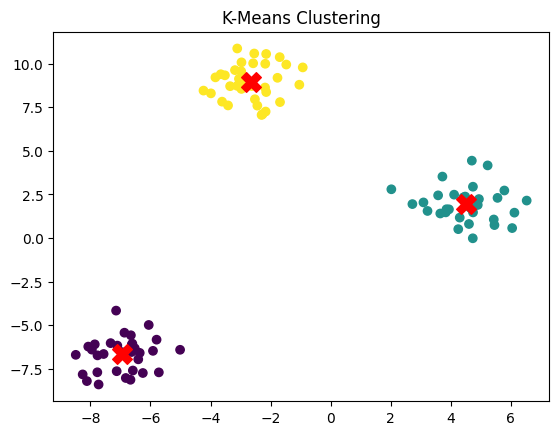

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Dataset with 2 features and 3 clusters
X, y = make_blobs(n_samples=100, centers=3, random_state=42)

# Initialize KMeans with 3 clusters
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

# Predict the cluster labels
y_kmeans = kmeans.predict(X)

# Plot the clustered data
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='viridis')

# Plot the centroids
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], s=200, c='red', marker='X')
plt.title('K-Means Clustering')
plt.show()

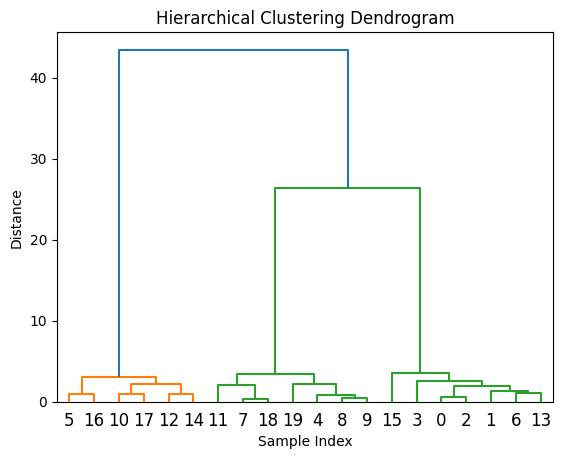

In [ ]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Generate the same dataset as before
X, y = make_blobs(n_samples=20, centers=3, random_state=42)

# Perform hierarchical/agglomerative clustering
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))

# Plot the dendrogram
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

In [ ]:
import numpy as np
from sklearn.decomposition import PCA

# High-dimensional data
np.random.seed(42)
data = np.random.rand(1000, 50)  # 1000 points in 50-dimensional space

# Reduce to 10 dimensions for easier clustering
pca = PCA(n_components=10)
data_reduced = pca.fit_transform(data)

# Initialize cluster centroids
k = 5  # Number of clusters
initial_centroids = data_reduced[np.random.choice(data_reduced.shape[0], k, replace=False)]

# Initial cluster centroids
print("Initial cluster centroids:", initial_centroids)

Initial cluster centroids: [[-0.61512278  0.22870617  0.14093541  0.41120735 -0.17786528 -0.28349634
   0.66455784 -0.23780145  0.44364176  0.51631718]
 [ 0.08782939 -0.25085447 -0.14156427  0.04670264 -0.19195436 -0.22312721
  -0.09422256 -0.03666948 -0.2082394   0.4506878 ]
 [ 0.13163096 -0.30565616 -0.37322194  0.67132113  0.28057897  0.11038163
   0.35826719 -0.26362622  0.53888298 -0.06769828]
 [ 0.47244544 -0.46535791  0.18142963  0.02625107 -0.47984073 -0.34690565
  -0.47496039 -0.16347053 -0.49418435  0.04090659]
 [ 0.386934   -0.49092208  0.58547291 -0.25898458  0.14491528 -0.18619063
  -0.77558887 -0.11296518  0.39300291 -0.03495022]]


In [ ]:
# BFR-specific data structures for summarizing clusters
cluster_summary = {
    'centroids': initial_centroids.copy(),
    'N': np.zeros(k),  # Number of points in each cluster
    'SUM': np.zeros_like(initial_centroids),  # Sum of points in each cluster
    'SUMSQ': np.zeros_like(initial_centroids)  # Sum of squares of points in each cluster
}

# Function to assign points to the nearest centroid
def assign_points(data, centroids):
    distances = np.linalg.norm(data[:, np.newaxis] - centroids, axis=2)
    return np.argmin(distances, axis=1)

# Main BFR clustering loop
for point in data_reduced:
    cluster_idx = assign_points(point.reshape(1, -1), cluster_summary['centroids'])[0]

    # Update cluster summary statistics
    cluster_summary['N'][cluster_idx] += 1
    cluster_summary['SUM'][cluster_idx] += point
    cluster_summary['SUMSQ'][cluster_idx] += point ** 2

    # Update centroid
    cluster_summary['centroids'][cluster_idx] = cluster_summary['SUM'][cluster_idx] / cluster_summary['N'][cluster_idx]

# Handle outliers (points far from any cluster centroid)
outliers = np.array([point for point in data_reduced if np.min(np.linalg.norm(point - cluster_summary['centroids'], axis=1)) > 1.0])

# Final cluster centroids
print("Final cluster centroids:", cluster_summary['centroids'])

Final cluster centroids: [[-0.27979016  0.20130801 -0.00384266 -0.03781949 -0.05530175  0.10301819
   0.06203813 -0.03071416  0.08075879  0.03863605]
 [ 0.04435197 -0.10660305 -0.26083498  0.13478775  0.04115535 -0.21443164
   0.02598727  0.16734266 -0.02996712 -0.12388145]
 [ 0.25899943  0.05701784  0.08458822  0.19497753  0.08296396  0.08090794
  -0.08864906 -0.04129394 -0.01701161  0.11128223]
 [-0.27927795 -0.37255501  0.16896029  0.03047475  0.02757078 -0.06843039
   0.0841341  -0.14015057 -0.22877792  0.01153596]
 [ 0.18399717 -0.05424706  0.0397433  -0.38546205 -0.09571087 -0.01865916
  -0.04511534  0.0270141   0.07416803 -0.10582596]]
